In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def plot_scatter(X, color, alpha=0.5):
  return plt.scatter(X[:,0], X[:,1], c=color, alpha=alpha, edgecolors="k")

In [32]:
N_SAMPLES = 1000
RANDOM_STATE =42
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=N_SAMPLES, cluster_std=[1.6, 1.0, 1.5], centers=[(-7, -7), (1, 1), (7, 5)],
                  random_state=RANDOM_STATE)

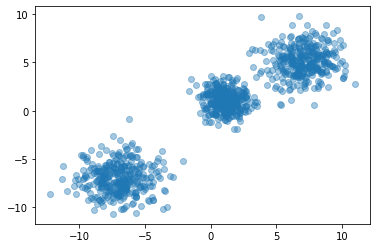

In [33]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.4)

In [34]:
n_classes = 3
n_estimators = 100
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=n_estimators)

In [35]:
AB_class = model.fit(X, y)

In [36]:
print(AB_class.predict([[7.5, -10]]))

[2]


In [37]:
label_ab = np.array([])

for i in range(len(X)):
  label_example_ab = AB_class.predict([[X[i, 0], X[i, 1]]])
  label_ab = np.hstack([label_ab, label_example_ab])

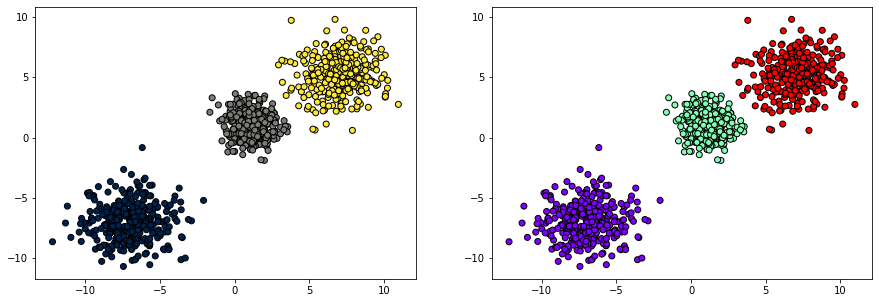

In [38]:
fig=plt.figure(figsize=(15, 5))
ax=fig.add_subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='cividis', edgecolors='k')
ax=fig.add_subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=label_ab, cmap='rainbow', edgecolors='k')

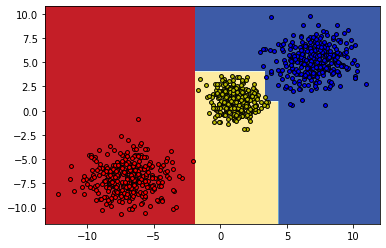

In [39]:
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

x_min, x_max = X[:, 0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = AB_class.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
for i, color in zip(range(n_classes), plot_colors):
  idx = np.where(y == i)
  plt.scatter(
      X[idx, 0],
      X[idx, 1],
      c=color,
      cmap=plt.cm.RdYlBu,
      edgecolor='black',
      s=15,
  )

In [40]:
print(AB_class.predict([[0, -2.5]]))

[1]


In [42]:
from sklearn.datasets import make_circles
n_samles = 1500
X_cir, y_cir = make_circles(n_samples=n_samles, factor=0.7, noise=0.05)

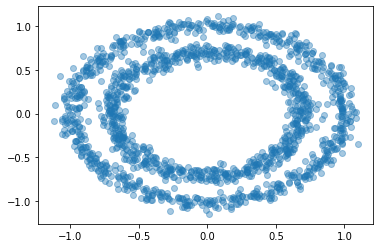

In [43]:
plt.scatter(X_cir[:, 0], X_cir[:, 1], alpha = 0.4)

In [44]:
AB_class_cir = model.fit(X_cir, y_cir)

In [45]:
AB_class_cir

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=100)

In [46]:
label_ab_cir = np.array([])
for i in range(len(X_cir)):
  label_example_ab_cir = AB_class_cir.predict([[X_cir[i, 0], X_cir[i, 1]]])
  label_ab_cir = np.hstack([label_ab_cir, label_example_ab_cir])

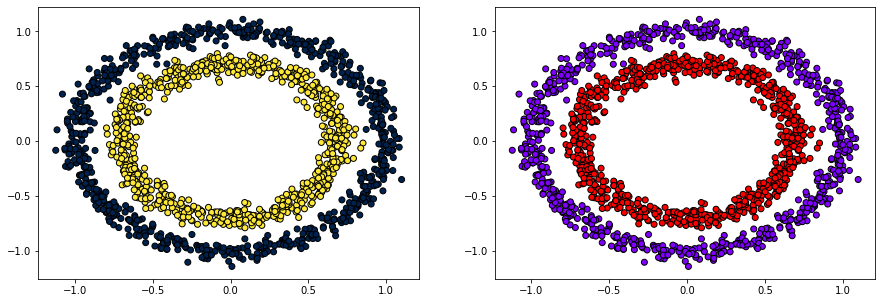

In [48]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121)
plt.scatter(X_cir[:,0], X_cir[:,1], c=y_cir, cmap='cividis', edgecolors='k')
ax = fig.add_subplot(122)
plt.scatter(X_cir[:,0], X_cir[:,1], c=label_ab_cir, cmap='rainbow', edgecolors='k')

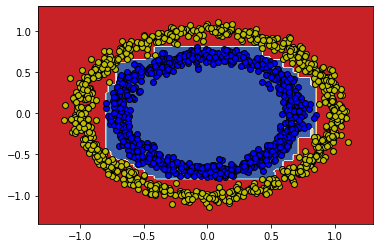

In [52]:
n_classes = 2
plot_colors = "yb"
plot_step = 0.02

x_min, x_max = X_cir[:, 0].min() - 0.2, X_cir[:,0].max() + 0.2
y_min, y_max = X_cir[:, 1].min() - 0.2, X_cir[:,1].max() + 0.2

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.1, w_pad=0.1, pad=1.5)

Z = AB_class_cir.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
for i, color in zip(range(n_classes), plot_colors):
  idx = np.where(y_cir == i)
  plt.scatter(
      X_cir[idx, 0],
      X_cir[idx, 1],
      c=color,
      cmap="inferno",
      edgecolor='black',
      s=35,
  )

In [53]:
from sklearn.ensemble import BaggingClassifier

In [54]:
model_2 = BaggingClassifier(n_estimators=n_estimators)

In [56]:
BK_class = model_2.fit(X, y)

In [58]:
label_bk = np.array([])
for i in range(len(X)):
  label_example_bk = BK_class.predict([[X[i, 0], X[i, 1]]])
  label_bk= np.hstack([label_bk, label_example_bk])

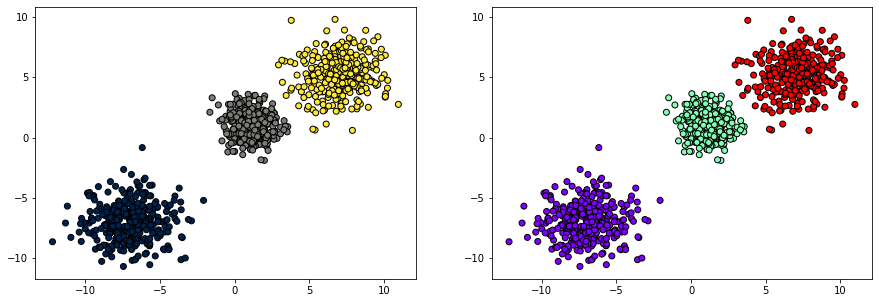

In [62]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='cividis', edgecolors='k')
ax = fig.add_subplot(122)
plt.scatter(X[:,0], X[:,1], c=label_bk, cmap='rainbow', edgecolors='k')

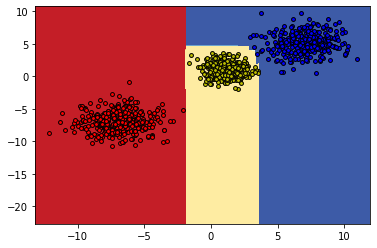

In [65]:
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

x_min, x_max = X[:, 0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:, 1].min() - 12, X[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.1, w_pad=0.1, pad=1.5)

Z = BK_class.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
for i, color in zip(range(n_classes), plot_colors):
  idx = np.where(y == i)
  plt.scatter(
      X[idx, 0],
      X[idx, 1],
      c=color,
      cmap="inferno",
      edgecolor='black',
      s=15,
  )

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [68]:
estimators = [('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
              ('knn', KNeighborsClassifier(3))]

In [75]:
model_3 = StackingClassifier(estimators=estimators, final_estimator=(None))

In [76]:
ST_class = model_3.fit(X, y)

In [79]:
label_st = np.array([])
for i in range(len(X)):
  label_example_st = ST_class.predict([[X[i, 0], X[i, 1]]])
  label_bk= np.hstack([label_st, label_example_st])

In [82]:
a = ST_class.predict([[1, 1]])

In [83]:
a

array([1])

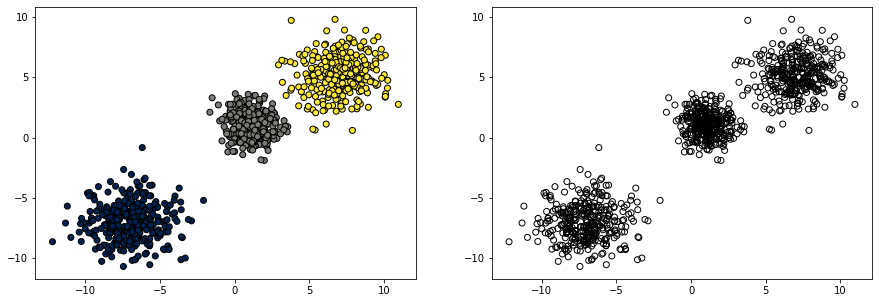

In [86]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='cividis', edgecolors='k')
ax = fig.add_subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=label_st, cmap='rainbow', edgecolors='k')

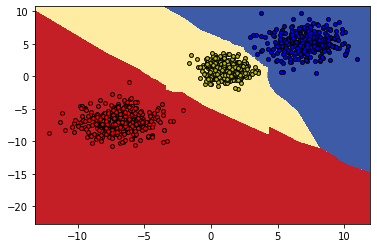

In [87]:
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

x_min, x_max = X[:, 0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:, 1].min() - 12, X[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.1, w_pad=0.1, pad=1.5)

Z = ST_class.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
for i, color in zip(range(n_classes), plot_colors):
  idx = np.where(y == i)
  plt.scatter(
      X[idx, 0],
      X[idx, 1],
      c=color,
      cmap="inferno",
      edgecolor='black',
      s=15,
  )